In [1]:
import pandas as pd

In [2]:
wti = pd.read_csv('data/WTI.csv', parse_dates=True, index_col='date', dayfirst=True)

In [3]:
wti_pct = wti.pct_change().dropna()

<AxesSubplot:xlabel='date'>

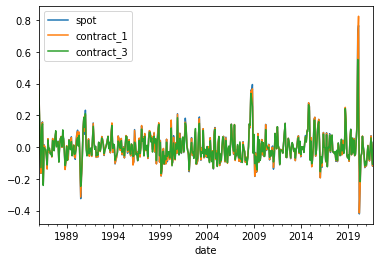

In [4]:
wti_pct.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
adf_spot = adfuller(wti_pct.spot)

In [7]:
print(adf_spot[1])

3.053250126635551e-25


In [8]:
adf_1 = adfuller(wti_pct.contract_1)
print(adf_1[1])

3.6766428513743814e-25


In [9]:
adf_3 = adfuller(wti_pct.contract_3)
print(adf_3[1])

8.746792702856164e-21


In [10]:
epu = pd.read_csv('data/EPUGlobal.csv', parse_dates=True, index_col='date', dayfirst=True)

In [11]:
epu_shock = epu.pct_change().diff().dropna()
epu_shock = epu_shock.loc[(epu_shock!=0).any(axis=1)]

<AxesSubplot:xlabel='date'>

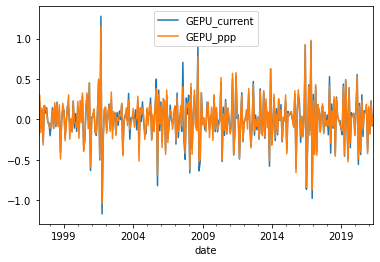

In [12]:
epu_shock.plot()

In [13]:
adf_gepu = adfuller(epu_shock.GEPU_current)
print(adf_gepu[1])

2.304215626134447e-12


In [14]:
import statsmodels.api as sm

In [15]:
df = wti_pct.join(epu_shock).dropna()
df.head()

,spot,contract_1,contract_3,GEPU_current,GEPU_ppp
date,,,,,
2021-05-01,-0.086999,-0.086755,-0.077974,0.051680,0.028355
2021-04-01,-0.052938,-0.053100,-0.050463,-0.083099,-0.067345
2021-03-01,0.009883,0.010697,0.008451,0.227285,0.226915
2021-02-01,-0.052784,-0.052919,-0.055117,-0.164491,-0.184622
2021-01-01,-0.119241,-0.117846,-0.112911,0.132958,0.158564


In [16]:
def news_regression(y_col, x_col, lags=12, df=df):
    x_cols = []
    for i in range(lags+1):
        new_col = f'{x_col}-lag{i}'
        df[new_col] = df[f'{x_col}'].shift(-i)
        x_cols.append(new_col)
    df = df.dropna()
    return sm.OLS(df[y_col], sm.add_constant(df[x_cols])).fit()

In [17]:
model1 = news_regression('spot', 'GEPU_current')

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.110
Date:                Mon, 27 Dec 2021   Prob (F-statistic):              0.350
Time:                        18:36:21   Log-Likelihood:                 220.11
No. Observations:                 279   AIC:                            -412.2
Df Residuals:                     265   BIC:                            -361.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0005      0.007      0.079      0.937      -0.013       0.014
GEPU_current-lag0      0.0999      0.034      2.913      0.004       0.032       0.167
GEPU_current-lag1      0.1407      0.051      2.771      0.006       0.041       0.241
GEPU_current-lag2      0.1382      0.063      2.200      0.029       0.014       0.262
GEPU_current-lag3      0.1401      0.074      1.902      0.058      -0.005       0.285
GEPU_current-lag4      0.1433      0.081      1.771      0.078      -0.016       0.303
GEPU_current-lag5      0.0887      0.084      1.055      0.292      -0.077       0.254
GEPU_current-lag6      0.0741      0.085      0.875      0.382      -0.093       0.241
GEPU_current-lag7      0.0205      0.084      0.244      0.807      -0.145       0.186
GEPU_current-lag8      0.0103      0.081      0.127      0.899      -0.149       0.169
GEPU_current-lag9      0.0200      0.073      0.273      0.785      -0.125       0.165
GEPU_current-lag10     0.0136      0.063      0.218      0.828      -0.110       0.137
GEPU_current-lag11     0.0067      0.051      0.133      0.895      -0.093       0.106
GEPU_current-lag12     0.0081      0.034      0.235      0.815      -0.060       0.076
==============================================================================
Omnibus:                      166.130   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2115.912
Skew:                           2.135   Prob(JB):                         0.00
Kurtosis:                      15.798   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model2 = news_regression('contract_1', 'GEPU_current')
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             contract_1   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.117
Date:                Mon, 27 Dec 2021   Prob (F-statistic):              0.344
Time:                        18:36:21   Log-Likelihood:                 221.90
No. Observations:                 279   AIC:                            -415.8
Df Residuals:                     265   BIC:                            -365.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0004      0.007      0.064      0.949      -0.013       0.014
GEPU_current-lag0      0.0999      0.034      2.931      0.004       0.033       0.167
GEPU_current-lag1      0.1412      0.050      2.798      0.006       0.042       0.240
GEPU_current-lag2      0.1354      0.062      2.169      0.031       0.012       0.258
GEPU_current-lag3      0.1372      0.073      1.874      0.062      -0.007       0.281
GEPU_current-lag4      0.1415      0.080      1.760      0.080      -0.017       0.300
GEPU_current-lag5      0.0867      0.084      1.039      0.300      -0.078       0.251
GEPU_current-lag6      0.0707      0.084      0.841      0.401      -0.095       0.236
GEPU_current-lag7      0.0210      0.083      0.252      0.802      -0.143       0.185
GEPU_current-lag8      0.0079      0.080      0.098      0.922      -0.150       0.166
GEPU_current-lag9      0.0181      0.073      0.248      0.804      -0.126       0.162
GEPU_current-lag10     0.0131      0.062      0.211      0.833      -0.109       0.136
GEPU_current-lag11     0.0045      0.050      0.090      0.929      -0.094       0.103
GEPU_current-lag12     0.0082      0.034      0.241      0.809      -0.059       0.075
==============================================================================
Omnibus:                      167.299   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2172.054
Skew:                           2.148   Prob(JB):                         0.00
Kurtosis:                      15.976   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model3 = news_regression('contract_3', 'GEPU_current')

In [21]:
import matplotlib.pyplot as plt

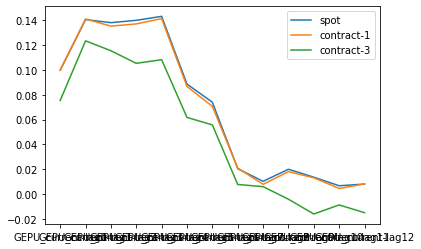

In [22]:
plt.plot(model1.params[1:], label='spot')
plt.plot(model2.params[1:], label='contract-1')
plt.plot(model3.params[1:], label='contract-3')
plt.legend()

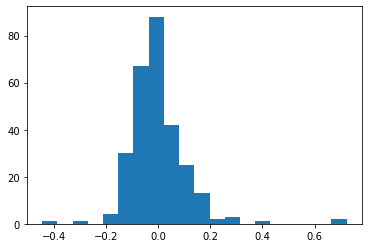

In [23]:
plt.hist(model1.resid, bins=20)
plt.show()

<AxesSubplot:xlabel='date'>

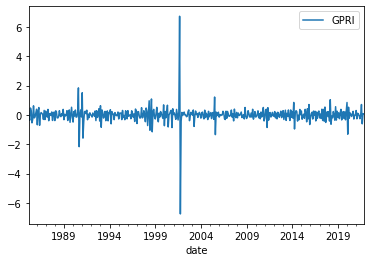

In [24]:
gpr = pd.read_csv('data/GPRGlobal.csv', parse_dates=True, index_col='date', dayfirst=True)
gpr_shock = gpr.pct_change().diff().dropna()
gpr_shock = gpr_shock.loc[(gpr_shock!=0).any(axis=1)]
gpr_shock.plot()

In [25]:
adf_gpr = adfuller(gpr_shock.GPRI)
print(adf_gpr[1])

3.201947929182281e-16


In [26]:
df1 = wti_pct.join(gpr_shock)

In [27]:
model4 = news_regression('spot', 'GPRI', df=df1)
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.6316
Date:                Mon, 27 Dec 2021   Prob (F-statistic):              0.828
Time:                        18:36:22   Log-Likelihood:                 369.82
No. Observations:                 418   AIC:                            -711.6
Df Residuals:                     404   BIC:                            -655.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.005      0.235      0.814      -0.009       0.011
GPRI-lag0      0.0115      0.012      0.969      0.333      -0.012       0.035
GPRI-lag1      0.0305      0.017      1.820      0.070      -0.002       0.063
GPRI-lag2      0.0491      0.021      2.382      0.018       0.009       0.090
GPRI-lag3      0.0455      0.023      1.972      0.049       0.000       0.091
GPRI-lag4      0.0396      0.025      1.593      0.112      -0.009       0.089
GPRI-lag5      0.0361      0.026      1.392      0.165      -0.015       0.087
GPRI-lag6      0.0387      0.026      1.475      0.141      -0.013       0.090
GPRI-lag7      0.0312      0.026      1.203      0.230      -0.020       0.082
GPRI-lag8      0.0198      0.025      0.796      0.427      -0.029       0.069
GPRI-lag9      0.0186      0.023      0.807      0.420      -0.027       0.064
GPRI-lag10     0.0043      0.021      0.210      0.834      -0.036       0.045
GPRI-lag11    -0.0003      0.017     -0.017      0.987      -0.033       0.033
GPRI-lag12    -0.0015      0.012     -0.128      0.898      -0.025       0.022
==============================================================================
Omnibus:                      246.434   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4099.623
Skew:                           2.158   Prob(JB):                         0.00
Kurtosis:                      17.723   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model5 = news_regression('contract_1', 'GPRI', df=df1)
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             contract_1   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.5916
Date:                Mon, 27 Dec 2021   Prob (F-statistic):              0.861
Time:                        18:36:22   Log-Likelihood:                 372.24
No. Observations:                 418   AIC:                            -716.5
Df Residuals:                     404   BIC:                            -660.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.005      0.225      0.822      -0.009       0.011
GPRI-lag0      0.0090      0.012      0.761      0.447      -0.014       0.032
GPRI-lag1      0.0272      0.017      1.630      0.104      -0.006       0.060
GPRI-lag2      0.0460      0.020      2.247      0.025       0.006       0.086
GPRI-lag3      0.0432      0.023      1.881      0.061      -0.002       0.088
GPRI-lag4      0.0372      0.025      1.503      0.134      -0.011       0.086
GPRI-lag5      0.0339      0.026      1.315      0.189      -0.017       0.084
GPRI-lag6      0.0360      0.026      1.379      0.169      -0.015       0.087
GPRI-lag7      0.0298      0.026      1.156      0.248      -0.021       0.080
GPRI-lag8      0.0176      0.025      0.713      0.476      -0.031       0.066
GPRI-lag9      0.0164      0.023      0.717      0.474      -0.029       0.062
GPRI-lag10     0.0034      0.020      0.168      0.866      -0.037       0.044
GPRI-lag11    -0.0017      0.017     -0.102      0.919      -0.034       0.031
GPRI-lag12    -0.0023      0.012     -0.195      0.846      -0.026       0.021
==============================================================================
Omnibus:                      251.778   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4495.465
Skew:                           2.198   Prob(JB):                         0.00
Kurtosis:                      18.453   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model6 = news_regression('contract_3', 'GPRI', df=df1)
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             contract_3   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.7134
Date:                Mon, 27 Dec 2021   Prob (F-statistic):              0.750
Time:                        18:36:22   Log-Likelihood:                 465.26
No. Observations:                 418   AIC:                            -902.5
Df Residuals:                     404   BIC:                            -846.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.004     -0.103      0.918      -0.008       0.007
GPRI-lag0      0.0089      0.009      0.934      0.351      -0.010       0.028
GPRI-lag1      0.0288      0.013      2.161      0.031       0.003       0.055
GPRI-lag2      0.0371      0.016      2.264      0.024       0.005       0.069
GPRI-lag3      0.0366      0.018      1.990      0.047       0.000       0.073
GPRI-lag4      0.0344      0.020      1.739      0.083      -0.004       0.073
GPRI-lag5      0.0309      0.021      1.500      0.134      -0.010       0.071
GPRI-lag6      0.0309      0.021      1.477      0.141      -0.010       0.072
GPRI-lag7      0.0262      0.021      1.273      0.204      -0.014       0.067
GPRI-lag8      0.0149      0.020      0.754      0.451      -0.024       0.054
GPRI-lag9      0.0139      0.018      0.756      0.450      -0.022       0.050
GPRI-lag10     0.0006      0.016      0.034      0.973      -0.032       0.033
GPRI-lag11    -0.0050      0.013     -0.375      0.708      -0.031       0.021
GPRI-lag12    -0.0040      0.009     -0.421      0.674      -0.023       0.015
==============================================================================
Omnibus:                      147.867   Durbin-Watson:                   1.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              790.599
Skew:                           1.423   Prob(JB):                    2.11e-172
Kurtosis:                       9.107   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

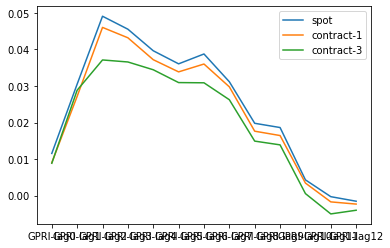

In [30]:
plt.plot(model4.params[1:], label='spot')
plt.plot(model5.params[1:], label='contract-1')
plt.plot(model6.params[1:], label='contract-3')
plt.legend()

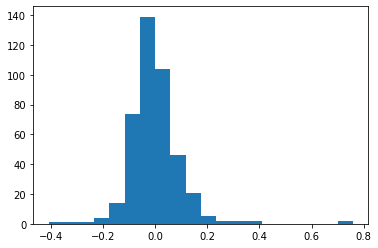

In [31]:
plt.hist(model4.resid, bins=20)
plt.show()

3 month contracts are consistently underreacting to news compared with spot and front-month prices. Is this because spot prices are much better at pricing things and speculators haven't caught on?

Or is it that futures are usually priced at a constant rate above spot due to future uncertainties, hence changes in price have diminished % change due to higher denominator? 

We can see that front-month futures react to the same extent as spot prices to surprises in changes in economic uncertainty, so it's more suggestive that spot market participants price news better, and those hedging/speculating using 3 month contracts haven't caught on.

To test if our method is any good at all, we can try with stock prices and VIX index.

In [32]:
sp500 = pd.read_csv('data/SP500.csv', parse_dates=True, index_col='date', dayfirst=True)
vix = pd.read_csv('data/VIX.csv', parse_dates=True, index_col='date', dayfirst=True)

<AxesSubplot:xlabel='date'>

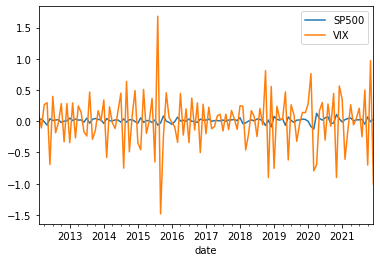

In [33]:
sp500_pct = sp500.pct_change().dropna()
vix_shock = vix.pct_change().diff().dropna()
df2 = sp500_pct.join(vix_shock)
df2.plot()

In [34]:
model7 = news_regression('SP500', 'VIX', df=df2)
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     13.83
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           1.47e-16
Time:                        18:36:23   Log-Likelihood:                 255.09
No. Observations:                 107   AIC:                            -482.2
Df Residuals:                      93   BIC:                            -444.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0103      0.002      4.438      0.000       0.006       0.015
VIX-lag0       0.0223      0.009      2.547      0.012       0.005       0.040
VIX-lag1       0.1244      0.013      9.447      0.000       0.098       0.150
VIX-lag2       0.1034      0.017      6.245      0.000       0.071       0.136
VIX-lag3       0.0793      0.019      4.085      0.000       0.041       0.118
VIX-lag4       0.0767      0.022      3.554      0.001       0.034       0.120
VIX-lag5       0.0701      0.023      3.041      0.003       0.024       0.116
VIX-lag6       0.0698      0.023      2.988      0.004       0.023       0.116
VIX-lag7       0.0564      0.023      2.470      0.015       0.011       0.102
VIX-lag8       0.0633      0.021      2.987      0.004       0.021       0.105
VIX-lag9       0.0399      0.019      2.100      0.038       0.002       0.078
VIX-lag10      0.0299      0.016      1.851      0.067      -0.002       0.062
VIX-lag11      0.0291      0.013      2.267      0.026       0.004       0.055
VIX-lag12      0.0146      0.008      1.737      0.086      -0.002       0.031
==============================================================================
Omnibus:                       11.670   Durbin-Watson:                   2.419
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.709
Skew:                           0.585   Prob(JB):                     0.000640
Kurtosis:                       4.389   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

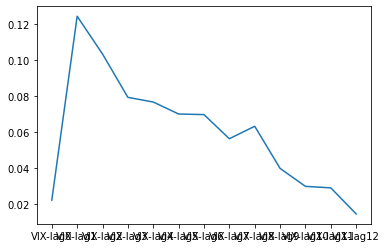

In [35]:
plt.plot(model7.params[1:])

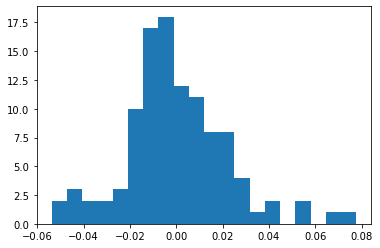

In [36]:
plt.hist(model7.resid, bins=20)
plt.show()

Overall, our analysis suggests that markets tend to demand higher returns after a bout of volatility/uncertainty. The implication of why 3-month crude futures demand less returns compared to 1-month futures is unclear. Our residuals are characterized by autocorrelation from the single exogenous regressor and fat tails from extreme shocks in our explanatory variables, so we should definitely not use this model in a predictive capacity, but it still holds good insights.